
1. Use the Boston dataset and the exploratory data analysis (EDA) to determine visually  which are the candidate features for the model (correlation and scatter plot) 
2. Calculate the descriptive statistics for the dataset. What is this information good for? 
3. Plot the histogram of each column. How do you interpret the distribution plots? 
4. Use the same methods for feature selection/elimination given in the sample code (RFE and stepwise forward/backward) to figure out the final model. 
5. For feature selection start with a larger number of features and monitor the  performance measures. Pick the number of features based on the performance measure when there is a significant change and stop when you do not see a major  improvement. 
6. Standardize the data by removing the mean and making the standard deviation equal to one (use from sklearn.preprocessing import StandardScaler, , and look at an example on  how it is used) 
7. Normalize the features by scaling them to a range between 0 and 1. Use the normalize object in scikit learn library to perform normalization on the data. Read the documentation from the preprocessing library documentation and look at the sample code given in the documentation as a guide on how to perform normalization. 
8. Perform steps 1-6 for the standardized data and compare the results with the original analysis. What are the differences and how do you interpret the impact of standardization? 

9. Perform steps 1-6 for the normalized data and compare the results with the original analysis. What are the differences and how do you interpret the impact of normalization? 
10. Include your code, the results and explanation of the results as a (.py) plus the output/results as comments in your code or as screenshots if it involves plots/graphics and upload to Canvas.  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import re

import warnings

warnings.filterwarnings('ignore')

filename = 'boston.csv'
data = read_csv(filename)
x_names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
y_name = ['medv']
data = data[x_names+y_name]

In [2]:
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [3]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

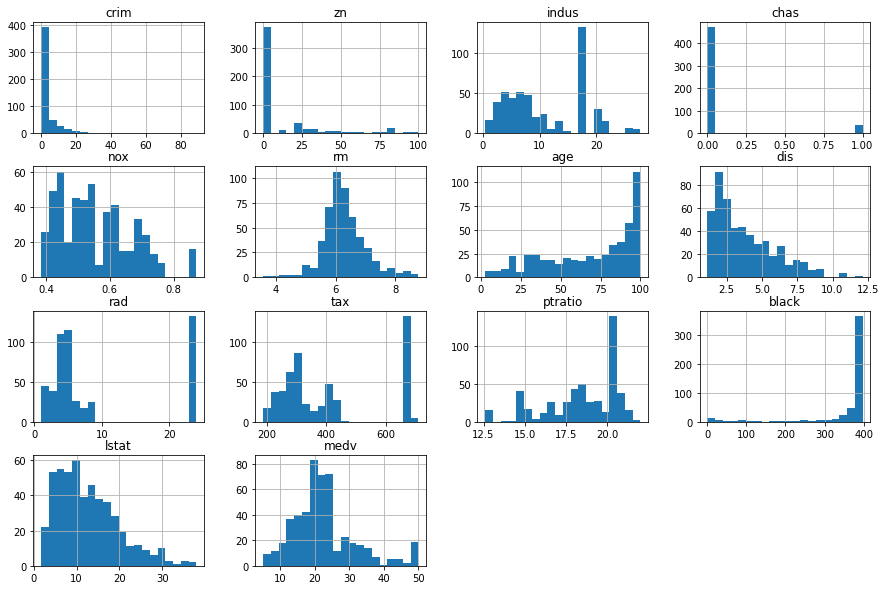

In [4]:
data.hist(bins=20, figsize=(15, 10))


<AxesSubplot:>

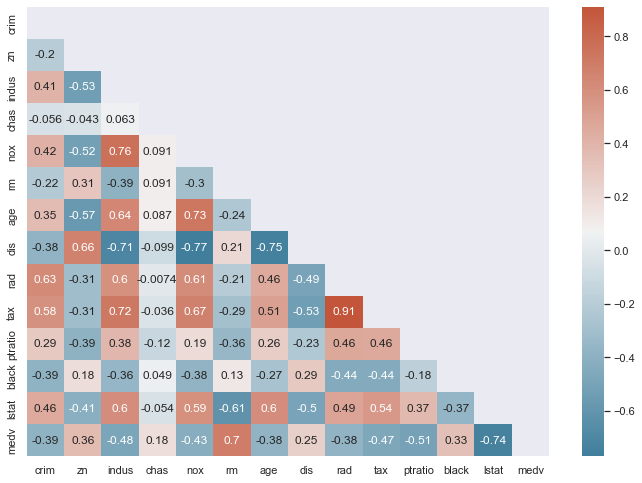

In [5]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

'rm':0.7, 'dis':0.25, 'ptratio':-0.51, 'lstat':-0.74



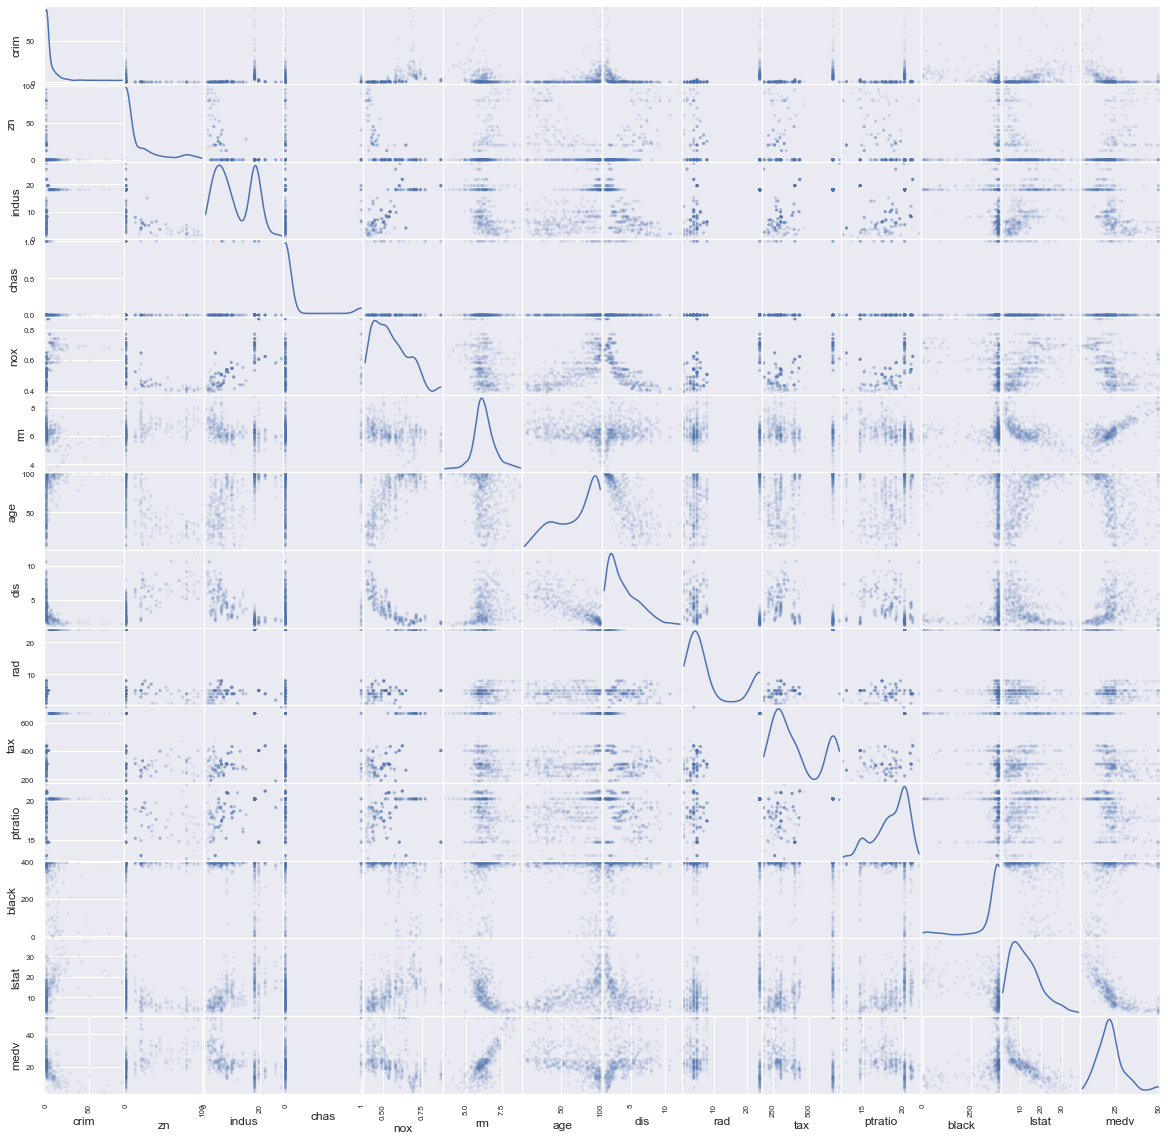

In [6]:
scatter_matrix(data, alpha=0.1, figsize=(20,20), diagonal='kde')
plt.show()

In [7]:
X = data[x_names]
Y = data[y_name]

In [8]:
Y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
import re

def run_rfe(X,Y,model = LinearRegression()):
    previous_score = 0.00

    for i in range(X.shape[1]):
        NUM_FEATURES = i+1
        #model = LinearRegression()
        rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
        fit = rfe.fit(X, Y)
        #print("Num Features:", fit.n_features_)
        #print("Selected Features:", fit.support_)
        #print("Feature Ranking:", fit.ranking_)
        # calculate the score for the selected features
        score = rfe.score(X,Y)
        delta = score - previous_score
        print("R2 Score with "+ str(fit.n_features_) +" selected features is: ", "{:0.3f}".format(score), '(',"{:0.3f}".format(delta),')')
        previous_score = score
        
run_rfe(X,Y,LinearRegression())


R2 Score with 1 selected features is:  0.183 ( 0.183 )
R2 Score with 2 selected features is:  0.535 ( 0.353 )
R2 Score with 3 selected features is:  0.556 ( 0.020 )
R2 Score with 4 selected features is:  0.616 ( 0.060 )
R2 Score with 5 selected features is:  0.634 ( 0.018 )
R2 Score with 6 selected features is:  0.716 ( 0.082 )
R2 Score with 7 selected features is:  0.717 ( 0.001 )
R2 Score with 8 selected features is:  0.723 ( 0.006 )
R2 Score with 9 selected features is:  0.724 ( 0.001 )
R2 Score with 10 selected features is:  0.728 ( 0.004 )
R2 Score with 11 selected features is:  0.734 ( 0.006 )
R2 Score with 12 selected features is:  0.741 ( 0.006 )
R2 Score with 13 selected features is:  0.741 ( 0.000 )


# Observations :
### Recursive Feature Elimination picks up 3 features because the highest jump is 0.27 in score


In [10]:
def pick_rfe_n_features(X, Y, NUM_FEATURES,model = LinearRegression()):
    #NUM_FEATURES = 4 
    #model = LinearRegression()
    rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
    fit = rfe.fit(X, Y)
    print("Num Features:", fit.n_features_)
    print("Selected Features:", fit.support_)
    print("Feature Ranking:", fit.ranking_)
    # calculate the score for the selected features
    score = rfe.score(X,Y)
    print("Model Score with selected features is: ", score)

    print('Features : ',X.columns[rfe.support_].tolist())

pick_rfe_n_features(X, Y, 4)

Num Features: 4
Selected Features: [False False False  True  True  True False False False False  True False
 False]
Feature Ranking: [ 5  7  6  1  1  1 10  2  4  8  1  9  3]
Model Score with selected features is:  0.6156465556218185
Features :  ['chas', 'nox', 'rm', 'ptratio']


In [11]:
def pick_rfe_n_features(X, Y, NUM_FEATURES,model = LinearRegression()):
    #NUM_FEATURES = 4 
    #model = LinearRegression()
    rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
    fit = rfe.fit(X, Y)
    print("Num Features:", fit.n_features_)
    print("Selected Features:", fit.support_)
    print("Feature Ranking:", fit.ranking_)
    # calculate the score for the selected features
    score = rfe.score(X,Y)
    print("Model Score with selected features is: ", score)

    print('Selected Features : ', X.columns[rfe.support_].tolist())

pick_rfe_n_features(X, Y, 4)

Num Features: 4
Selected Features: [False False False  True  True  True False False False False  True False
 False]
Feature Ranking: [ 5  7  6  1  1  1 10  2  4  8  1  9  3]
Model Score with selected features is:  0.6156465556218185
Selected Features :  ['chas', 'nox', 'rm', 'ptratio']


# Stepwise Selection

In [12]:
# stepwise forward-backward selection
# need to change the input types as X in this function needs to be a pandas
# dataframe
 
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    #col_names = X.columns
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            
        pval_tags = new_pval.index    
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(pval_tags[best_feature])
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        pvalues_tags = pvalues.index
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(pvalues_tags[worst_feature])
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included



In [13]:
result = stepwise_selection(X, Y, initial_list=X.columns.tolist(),threshold_in=0.01, threshold_out = 0.05, verbose=True)

print('resulting features:')
print(result)

Drop                              6 with p-value 0.958229
Drop                              2 with p-value 0.737989
resulting features:
['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


# Data Standardization


In [15]:
# Standardize ( mean = 0 m SD = 1 ) the numerical features.
# One-hot encoding columns are excluded from Standardization
#

scaler = StandardScaler()
scaler.fit(data[x_names])
#print(scaler.mean_)
X_standard = pd.DataFrame(scaler.transform(data[x_names]), columns=x_names)


In [16]:
X_standard.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439


## RFE and Stepwise Selection with Standardized data

In [17]:
run_rfe(X_standard,Y,LinearRegression())

R2 Score with 1 selected features is:  0.544 ( 0.544 )
R2 Score with 2 selected features is:  0.639 ( 0.094 )
R2 Score with 3 selected features is:  0.679 ( 0.040 )
R2 Score with 4 selected features is:  0.690 ( 0.012 )
R2 Score with 5 selected features is:  0.708 ( 0.018 )
R2 Score with 6 selected features is:  0.709 ( 0.001 )
R2 Score with 7 selected features is:  0.715 ( 0.006 )
R2 Score with 8 selected features is:  0.722 ( 0.007 )
R2 Score with 9 selected features is:  0.728 ( 0.006 )
R2 Score with 10 selected features is:  0.735 ( 0.007 )
R2 Score with 11 selected features is:  0.741 ( 0.005 )
R2 Score with 12 selected features is:  0.741 ( 0.000 )
R2 Score with 13 selected features is:  0.741 ( 0.000 )


In [28]:
pick_rfe_n_features(X_standard, Y, 2)

Num Features: 2
Selected Features: [False False False False False  True False False False False False False
  True]
Feature Ranking: [ 7  8 11 10  4  1 12  3  5  6  2  9  1]
Model Score with selected features is:  0.6385616062603403
Selected Features :  ['rm', 'lstat']


In [32]:
result = stepwise_selection(X_standard, Y, 
                            initial_list=X_standard.columns.tolist(),
                            threshold_in=0.01, 
                            threshold_out = 0.05, 
                            verbose=True)

print('resulting features:')
print(result)

Drop                              6 with p-value 0.958229
Drop                              2 with p-value 0.737989
resulting features:
['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


# Data Normalization

In [20]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(data[x_names])

X_normal = pd.DataFrame(transformer.transform(data[x_names]), columns=x_names)


## RFE and Stepwise Selection with Normalized Data

In [21]:
run_rfe(X_normal,Y,LinearRegression())


R2 Score with 1 selected features is:  0.484 ( 0.484 )
R2 Score with 2 selected features is:  0.639 ( 0.155 )
R2 Score with 3 selected features is:  0.679 ( 0.040 )
R2 Score with 4 selected features is:  0.690 ( 0.012 )
R2 Score with 5 selected features is:  0.708 ( 0.018 )
R2 Score with 6 selected features is:  0.711 ( 0.003 )
R2 Score with 7 selected features is:  0.716 ( 0.005 )
R2 Score with 8 selected features is:  0.722 ( 0.006 )
R2 Score with 9 selected features is:  0.728 ( 0.006 )
R2 Score with 10 selected features is:  0.735 ( 0.007 )
R2 Score with 11 selected features is:  0.741 ( 0.005 )
R2 Score with 12 selected features is:  0.741 ( 0.000 )
R2 Score with 13 selected features is:  0.741 ( 0.000 )


In [22]:
pick_rfe_n_features(X_normal, Y, 2)

Num Features: 2
Selected Features: [False False False False False  True False False False False False False
  True]
Feature Ranking: [ 5  8 11 10  4  1 12  3  6  7  2  9  1]
Model Score with selected features is:  0.6385616062603403
Selected Features :  ['rm', 'lstat']


In [33]:
result = stepwise_selection(X_normal, Y, 
                            initial_list=X_normal.columns.tolist(),
                            threshold_in=0.01, 
                            threshold_out = 0.05, 
                            verbose=True)

print('resulting features:')
print(result)

Drop                              6 with p-value 0.958229
Drop                              2 with p-value 0.737989
resulting features:
['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
